In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [35]:
"""
Load data from csv file.

"""
dataframe = pd.read_csv("SpotifyFeaturesNumeric.csv")
data = np.array(dataframe)
m, n = np.shape(data)
y = data[:, 0]   # Previous classification
x = data[:, 2:n] # Data for kmeas 
print('x:', np.shape(x))
print('y:', np.shape(y))

x: (232725, 14)
y: (232725,)


In [36]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
x = sc.fit_transform(x) 


In [37]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
x = pca.fit_transform(x) 
  
explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[0.26377324 0.12360912]


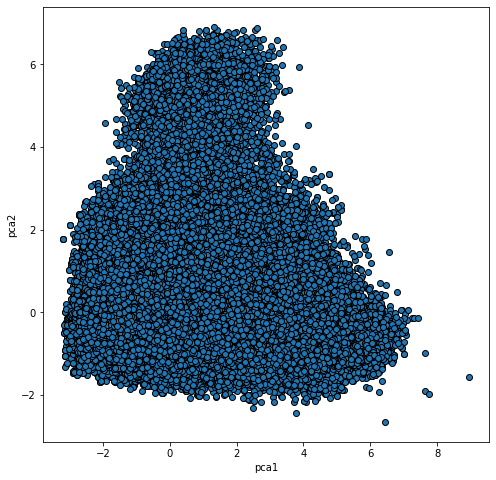

In [38]:
plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('pca1')
plt.ylabel('pca2');

In [39]:
kmeans = KMeans(n_clusters = 5)
c = kmeans.fit_predict(x)
c

array([4, 4, 0, ..., 0, 4, 3], dtype=int32)

k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29


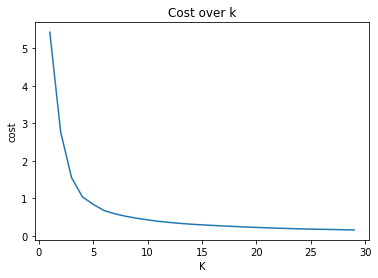

In [40]:
K = np.arange(1, 30)
Jn = []
idx = 0
m, n = x.shape
for k in K:
    print("k: " + str(k))
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_predict(x)
    Jn.append((1/m) * kmeans.inertia_)
    idx += 1

plt.plot(K, Jn)
plt.title('Cost over k')
plt.xlabel('K')
plt.ylabel('cost');

In [42]:
d = dict()
d['genre'] = y
d['pca1'] = x[:,0]
d['pca2'] = x[:,1]
d['cluster'] = c

outdf = pd.DataFrame(data=d)
outdf.to_excel(r'SpotifyPCAKmeans5.xlsx', index = False, header=True)